# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Recreate-file" data-toc-modified-id="Recreate-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recreate file</a></div>

In [35]:
import numpy as np
import pandas as pd
import sys
import time
import pickle
from many_stop_words import get_stop_words

In [ ]:
# read in dataframe
df = pd.read_pickle('./preprocessing.p')
print('number of rows, unchanged: ', len(df))
df.head()

In [36]:
# obtain vocab set
vocab_set = set()

subject_list = df.subject_preprocessed.values
bestanswer_list = df.bestanswer_preprocessed.values
string_list = subject_list + bestanswer_list
total_string = len(string_list)
split_string = lambda x, n: [x[i:i+n] for i in range(0, len(x), n)]
for i, row in enumerate(string_list):
    string1 = row
    string2 = string1[1:]
    string3 = string2[1:]

    string_a = split_string(string1, 3)
    if len(string_a[-1]) != 3:
        string_a = string_a[:-1]
        
    string_b = split_string(string2, 3)
    if len(string_b[-1]) != 3:
        string_b = string_b[:-1]
        
    string_c = split_string(string3, 3)
    if len(string_c[-1]) != 3:
        string_c = string_c[:-1]
        
    vocab_set.update(string_a)
    vocab_set.update(string_b)
    vocab_set.update(string_c)
    if i % 1000 == 0:
        sys.stdout.write("\r" + str((i/total_string)*100))

99.95513529545924565

In [37]:
len(list(vocab_set))

20374

In [38]:
# vocab_set to vocab_dict
vocab_dict = {k:i for i,k in enumerate(list(vocab_set))}
pickle.dump(vocab_dict, open('vocab_dict.p', 'wb'))

In [9]:
f = open('vocab_dict.p', 'rb')
vocab_dict = pickle.load(f)

In [39]:
subject_list = df.subject_preprocessed.values
bestanswer_list = df.bestanswer_preprocessed.values

subject_encoded_sparse = subject_list.copy()
bestanswer_encoded_sparse = bestanswer_list.copy()

In [40]:
def obtain_unique_trigrams(string, split_string):
    string1 = string
    string2 = string1[1:]
    string3 = string2[1:]

    string_a = split_string(string1, 3)
    if len(string_a[-1]) != 3:
        string_a = string_a[:-1]
        
    string_b = split_string(string2, 3)
    if len(string_b[-1]) != 3:
        string_b = string_b[:-1]
        
    string_c = split_string(string3, 3)
    if len(string_c[-1]) != 3:
        string_c = string_c[:-1]
        
    return list(set(string_a + string_b + string_c))

In [41]:
def encode_dense(ls, d):
    ls = [d[i] for i in ls]
    ls.sort()
    return ls

In [43]:
split_string = lambda x, n: [x[i:i+n] for i in range(0, len(x), n)]
subject_list = df.subject_preprocessed.values
bestanswer_list = df.bestanswer_preprocessed.values
total_string = len(string_list)
for i in range(len(subject_list)):
    subject_encoded_sparse[i] = np.array(encode_dense(obtain_unique_trigrams(subject_list[i], split_string), vocab_dict))
    bestanswer_encoded_sparse[i] = np.array(encode_dense(obtain_unique_trigrams(bestanswer_list[i], split_string), vocab_dict))
    
    if i % 1000 == 0:
        sys.stdout.write("\r" + str((i/total_string)*100))

99.95513529545924565

In [44]:
df['subject_encoded'] = subject_encoded_sparse
df['bestanswer_encoded'] = bestanswer_encoded_sparse

In [45]:
code_decode = {i:k for i,k in enumerate(list(vocab_set))}

In [46]:
obtain_unique_trigrams(df.subject_preprocessed.values[0], split_string)

['ve ',
 'neg',
 'g n',
 'ing',
 'ion',
 'er ',
 'ues',
 'umb',
 ' an',
 ' us',
 'ber',
 'tio',
 'r u',
 ' eg',
 'r e',
 'num',
 ' nu',
 'n a',
 'usi',
 'ans',
 ' ne',
 'wer',
 'sti',
 'e n',
 'gat',
 'mbe',
 'ive',
 'r n',
 'nsw',
 'ng ',
 'ega',
 'tiv',
 'ati',
 'swe',
 'sin',
 'eg ',
 'on ',
 'que',
 'est']

In [47]:
[code_decode[i] for i in df.subject_encoded.values[0]]

['ati',
 'ion',
 ' us',
 ' eg',
 ' nu',
 'on ',
 'g n',
 'est',
 'r n',
 'que',
 'ive',
 'tio',
 'umb',
 'usi',
 'e n',
 'sti',
 'wer',
 've ',
 ' ne',
 'gat',
 'mbe',
 'r u',
 'ans',
 'ber',
 'ing',
 'tiv',
 'ues',
 'er ',
 'num',
 'ega',
 'swe',
 ' an',
 'nsw',
 'r e',
 'eg ',
 'neg',
 'sin',
 'ng ',
 'n a']

In [48]:
df.head()

,uri,subject,content,bestanswer,cat,maincat,subcat,document_type,language,bestanswer_preprocessed,subject_preprocessed,subject_encoded,bestanswer_encoded
0,4180995,what is the question for the answer of negativ...,,(1-2)(3+4)=-7,Homework Help,Education & Reference,Education & Reference,wisdom,en-au,number number number number number,question answer negative number using number n...,"[562, 927, 940, 1580, 1663, 1802, 2324, 3466, ...","[1663, 5260, 5502, 11040, 12960, 15346, 16101]"
1,190392,My address bar is clicked but i still dont see...,,which address bar,Other - Internet,Computers & Internet,Computers & Internet,wisdom,en-us,address bar,address bar clicked still dont see,"[68, 1420, 2530, 2771, 3090, 3176, 3803, 4022,...","[1420, 4730, 7138, 7816, 9884, 10468, 14267, 1..."
2,2778258,why will people shoot up when they sit on a ho...,,Is this a business question??,Small Business,Business & Finance,Business & Finance,wisdom,en-in,business question,people shoot sit hot stove,"[992, 1203, 1742, 2530, 2849, 4655, 4724, 7263...","[927, 1420, 1593, 2419, 3466, 5277, 5431, 5603..."
3,1789358,how was the vietnam war fought on american soil?,,I think of the killings at Kent State in 1970....,Homework Help,Education & Reference,Education & Reference,wisdom,en-us,think killing kent state year college kid prot...,vietnam war fought american soil,"[246, 740, 763, 1759, 2071, 2122, 2224, 2496, ...","[49, 250, 562, 915, 927, 992, 1464, 1663, 1742..."
4,3027310,why michael jordan's father killed? is it beca...,,Have you been a hermit over the years?\n\nMJ's...,Basketball,Sports,Sports,wisdom,en-us,hermit year mj dad robbed murdered year ago tw...,michael jordan father killed mj best athlete w...,"[1718, 2472, 2530, 3067, 3466, 3968, 4449, 501...","[49, 567, 684, 1309, 1344, 1420, 1663, 2163, 2..."


In [15]:
!pip3 install tables

In [49]:
chunk_size = 50000
chunks = int(len(df) / float(chunk_size))+1
prev = 0
next_ = chunk_size
for chunk_id in range(chunks):
    df.iloc[prev:next_, :].to_pickle('dense_vector_' + str(chunk_id) + '.p')
    prev = next_
    next_ += chunk_size

# Recreate file

In [23]:
import glob
import pandas as pd
import numpy as np
files = glob.glob('dense_vector_*.p')

In [24]:
# print(files)
pds = []
for i, f in enumerate(files):
    print(i)
    df_part = pd.read_pickle(f)
    pds.append(df_part)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [25]:
df = pd.concat(pds, ignore_index=True)

In [51]:
df_minimal_subselection = df.loc[:, ['uri','subject_encoded', 'bestanswer_encoded']]

In [53]:
df_minimal_subselection

,uri,subject_encoded,bestanswer_encoded
0,4180995,"[562, 927, 940, 1580, 1663, 1802, 2324, 3466, ...","[1663, 5260, 5502, 11040, 12960, 15346, 16101]"
1,190392,"[68, 1420, 2530, 2771, 3090, 3176, 3803, 4022,...","[1420, 4730, 7138, 7816, 9884, 10468, 14267, 1..."
2,2778258,"[992, 1203, 1742, 2530, 2849, 4655, 4724, 7263...","[927, 1420, 1593, 2419, 3466, 5277, 5431, 5603..."
3,1789358,"[246, 740, 763, 1759, 2071, 2122, 2224, 2496, ...","[49, 250, 562, 915, 927, 992, 1464, 1663, 1742..."
4,3027310,"[1718, 2472, 2530, 3067, 3466, 3968, 4449, 501...","[49, 567, 684, 1309, 1344, 1420, 1663, 2163, 2..."
5,827829,"[1894, 2141, 2504, 3668, 4498, 4716, 5701, 622...","[684, 1436, 1610, 1737, 2122, 2425, 2454, 2528..."
6,856971,"[940, 1274, 1647, 1737, 1994, 2333, 2513, 2849...","[1342, 2485, 2567, 2868, 5103, 6011, 6859, 758..."
7,931816,"[13502, 15167, 18399, 19140, 19693]","[82, 91, 204, 725, 1283, 1343, 1374, 1406, 160..."
8,2602431,"[903, 2834, 5341, 5380, 7644, 8103, 10948, 118...","[4624, 4724, 5687, 8232, 9596, 10226, 10505, 1..."
9,734746,"[480, 1179, 2455, 2496, 2957, 4283, 4733, 5121...","[275, 339, 480, 562, 881, 927, 978, 1091, 1274..."


In [55]:
chunk_size = 250000
chunks = int(len(df) / float(chunk_size))+1
prev = 0
next_ = chunk_size
for chunk_id in range(chunks):
    df_minimal_subselection.iloc[prev:next_, :].to_pickle('minimal_sparse_' + str(chunk_id) + '.p')
    prev = next_
    next_ += chunk_size

In [4]:
del pds

In [26]:
# obtain total number of elements
total_len = 0
total_string = len(df)
subjects = df.subject_encoded.values
answers = df.bestanswer_encoded.values

for i in range(len(df)):
    total_len += len(subjects[i])
    total_len += len(answers[i])

    if i % 1000 == 0:
        sys.stdout.write("\r" + str((i/total_string)*100))   

99.95513529545924565

In [27]:
pre_allocated_array = np.full((total_len), -1, dtype=int)

In [9]:
pre_allocated_array[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
ls1 = df.subject_encoded.values
ls2 = df.bestanswer_encoded.values

In [30]:
index_start = 0
index_end = 0
total_string = len(df)
for i in range(len(df)):
    index_end += len(ls1[i])
    pre_allocated_array[index_start:index_end] = ls1[i] 
    index_start = index_end

    index_end += len(ls2[i])
    pre_allocated_array[index_start:index_end] = ls2[i] 
    index_start = index_end
    
    if i % 1000 == 0:
        sys.stdout.write("\r" + str((i/total_string)*100))   

99.95513529545924565

In [33]:
ok = set(pre_allocated_array)

In [ ]:
ok.sort()

In [34]:
ok

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 19

In [30]:
frequency = pd.Series(pre_allocated_array).value_counts()

In [33]:
%matplotlib inline

In [45]:
frequency.to_pickle('frequency_of_trigrams.p')

In [47]:
onzin = frequency.copy()

In [48]:
onzin.index=list(range(len(onzin)))

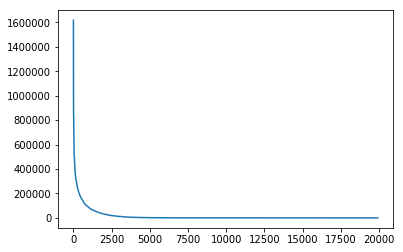

In [49]:
onzin.plot()

In [53]:
frequency 

8286     1616876
9803     1160485
13007    1127444
4913     1000053
11748     950296
8375      922414
5390      903977
6888      903667
19595     894779
13397     882904
9957      868612
4343      790708
65        770997
19155     767233
14263     758114
2766      756917
5483      756288
13527     718126
16359     705392
15027     705050
18347     698958
14044     669376
18217     663821
3435      643877
9470      642823
15530     636458
6231      630740
10862     626836
13035     624086
14729     615830
          ...   
17440          1
17562          1
11736          1
11743          1
11672          1
11635          1
1679           1
5554           1
1682           1
5548           1
11655          1
11658          1
17629          1
1692           1
17626          1
11678          1
11689          1
11730          1
17601          1
5532           1
11700          1
17590          1
17588          1
1709           1
17587          1
11703          1
17599          1
17572         

In [56]:
for i in range(1,200):
    print('trigram happens:', i, 'times: ', (frequency == i).sum())

trigram happens: 1 times:  1304
trigram happens: 2 times:  863
trigram happens: 3 times:  729
trigram happens: 4 times:  584
trigram happens: 5 times:  510
trigram happens: 6 times:  412
trigram happens: 7 times:  317
trigram happens: 8 times:  286
trigram happens: 9 times:  267
trigram happens: 10 times:  232
trigram happens: 11 times:  202
trigram happens: 12 times:  197
trigram happens: 13 times:  177
trigram happens: 14 times:  173
trigram happens: 15 times:  169
trigram happens: 16 times:  134
trigram happens: 17 times:  162
trigram happens: 18 times:  132
trigram happens: 19 times:  123
trigram happens: 20 times:  111
trigram happens: 21 times:  124
trigram happens: 22 times:  93
trigram happens: 23 times:  97
trigram happens: 24 times:  101
trigram happens: 25 times:  98
trigram happens: 26 times:  79
trigram happens: 27 times:  89
trigram happens: 28 times:  86
trigram happens: 29 times:  85
trigram happens: 30 times:  84
trigram happens: 31 times:  84
trigram happens: 32 times

In [58]:
len(frequency)

19923